# <span style='color:Blue'>  Loan Eligibility Classifier 
## <span style='color:Green'>  Business Problem

**"Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers."**


In [1]:
import pandas as pd
import numpy as np
from numpy import array 
import matplotlib as mpl

import matplotlib.pyplot as plt
import mpl_toolkits 
import datetime
import seaborn as sns 

# Read Dataset
ld = pd.read_csv('Loan_Dataset.csv')

In [2]:
# Check first five rows of data
ld.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Checking Number of rows and coloumns
ld.shape
# The below output shows that our dataset has 614 rows and 13 columns.

(614, 13)

In [4]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


##  Analyzing Values assigned to each Coloumn

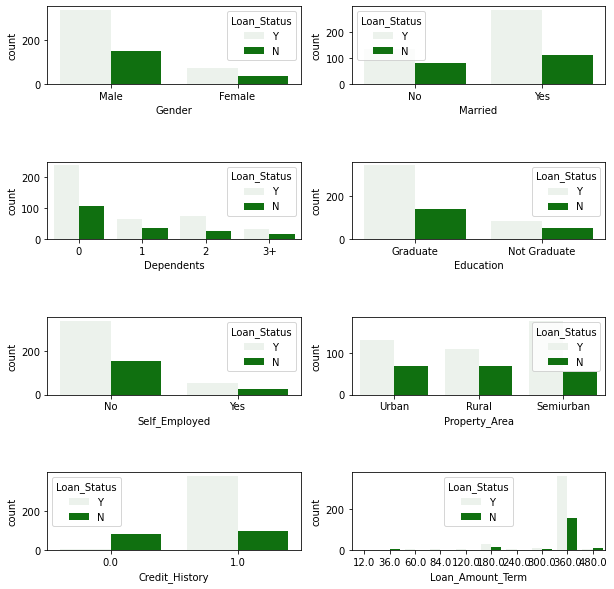

In [5]:
categorical_coloumns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Credit_History','Loan_Amount_Term']
fig,axes=plt.subplots(4,2,figsize=(10,10))
for idx,cat_col in enumerate(categorical_coloumns):
    row,col=idx//2,idx%2
    sns.countplot(x=cat_col,data=ld,hue='Loan_Status',ax=axes[row,col],color='green')
plt.subplots_adjust(hspace=1)

 **It can be inferred from the above bar plots that:**
 * Total number of male applicants are more than female.
 * Married applicants are more likely to be granted loans.
 * Less number of dependents increases chances of loan approval.
 * Being a Graduate is definitely an advantage towards the approval. 
 * Most of the applicants are not Self Employed.
 * People having Property Area in SemiUrban more likely to be granted loans.
 * Credit History plays the most important role in Loan Approval.Without Credit History, the loan status is likely to be rejected.
 * Most of the loans are for a period of 30 years.

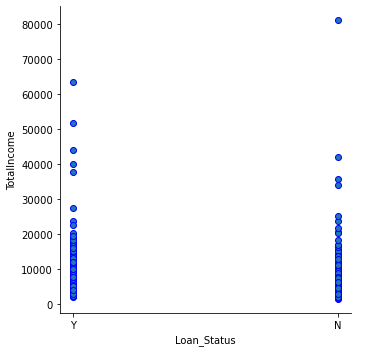

In [6]:
ld['TotalIncome']=ld['ApplicantIncome'] + ld['CoapplicantIncome']
g=sns.FacetGrid(ld,height=5)
g=g.map(plt.scatter,"Loan_Status","TotalIncome",edgecolor= "b").add_legend()
plt.show()

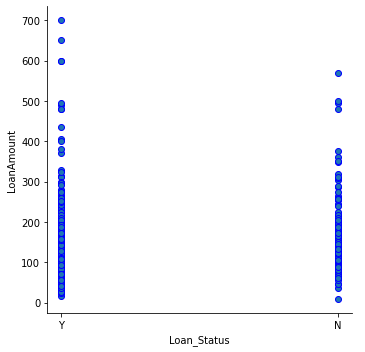

In [7]:
g=sns.FacetGrid(ld,height=5)
g=g.map(plt.scatter,"Loan_Status","LoanAmount",edgecolor= "b").add_legend()
plt.show()

**There is no significant relation to loan approval status for Applicantincome, Coapplicantincome and LoanAmount.**

Text(0, 0.5, 'Count')

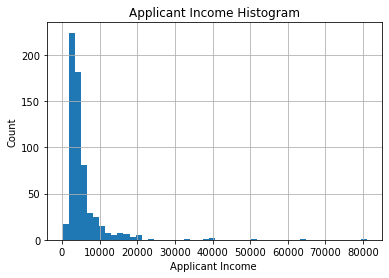

In [8]:
ld['ApplicantIncome'].hist(bins=50)
plt.title("Applicant Income Histogram")
plt.xlabel('Applicant Income ')
plt.ylabel('Count')

**This shows the Applicant Income Distribution.**

<AxesSubplot:>

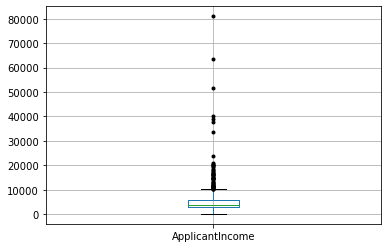

In [9]:
ld.boxplot(column="ApplicantIncome",sym="k.")

**This shows that the applicant income is not distributed uniformly among the population.The above shows income disparity.**

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

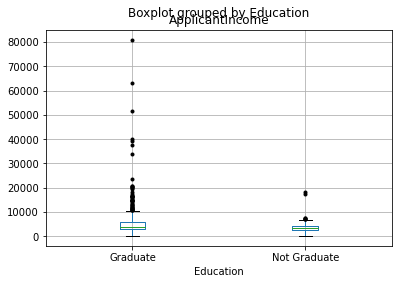

In [10]:
ld.boxplot(column="ApplicantIncome",by="Education",sym="k.")

**This shows Graduates have higher income.**

Text(0, 0.5, 'Count')

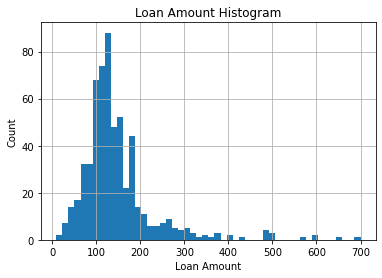

In [11]:
ld['LoanAmount'].hist(bins=50)
plt.title("Loan Amount Histogram")
plt.xlabel('Loan Amount')
plt.ylabel('Count')

**This shows the Loan Amount Distribution.**

<AxesSubplot:title={'center':'LoanAmount'}, xlabel='Education'>

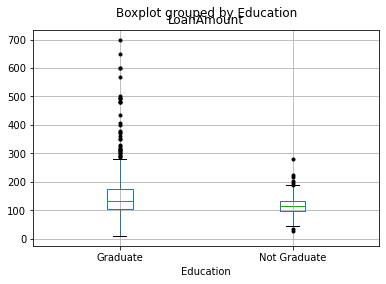

In [12]:
ld.boxplot(column="LoanAmount",by="Education",sym="k.")

**This shows how the Graduate Loan Amount varies in mean and outlier**

<AxesSubplot:title={'center':'LoanAmount'}, xlabel='Gender'>

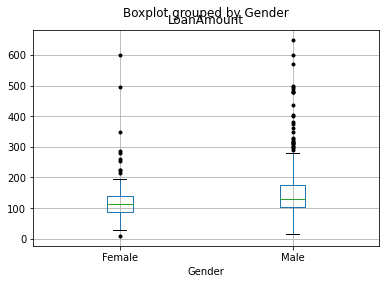

In [13]:
ld.boxplot(column="LoanAmount",by="Gender",sym="k.")

**This shows the Gender wise Distribution of Loan Amount taken.**



<AxesSubplot:title={'center':'LoanAmount'}, xlabel='Self_Employed'>

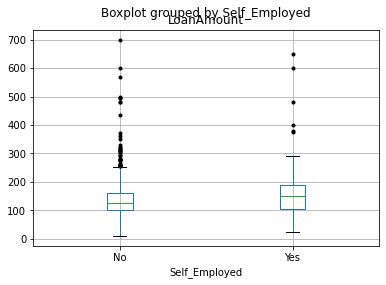

In [14]:
ld.boxplot(column="LoanAmount",by="Self_Employed",sym="k.")

**This shows Loan Amount distribution based on Employment type.**

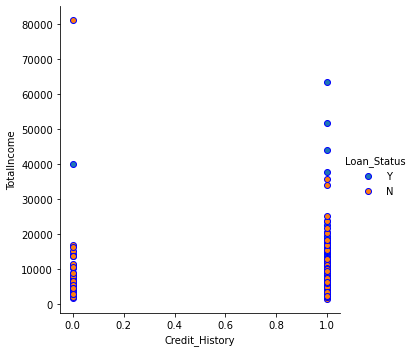

In [15]:
g=sns.FacetGrid(ld,hue="Loan_Status",height=5)
g=g.map(plt.scatter,"Credit_History","TotalIncome",edgecolor= "b").add_legend()
plt.show()

**This shows that Loan can get Appproved irrespective of Total Income(Applicant+ Co-Applicant income),if the applicant has provided Credit History.** 

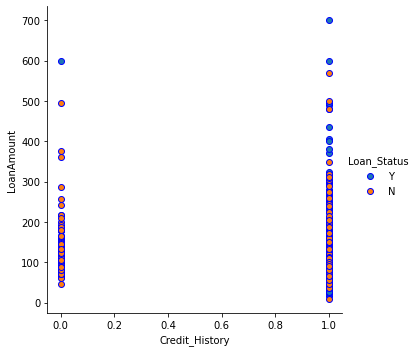

In [16]:
g=sns.FacetGrid(ld,hue="Loan_Status",height=5)
g=g.map(plt.scatter,"Credit_History","LoanAmount",edgecolor= "b").add_legend()
plt.show()

**Credit History plays an important role in determining the Loan Status**

 ## Pre-Processing Data

In [17]:
# Finding Null Values in loan_Dataset
ld.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
TotalIncome          False
dtype: bool

In [18]:
ld.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
TotalIncome           0
dtype: int64

In [19]:
#this cleans the data and drops all the null values column.This results in loss of information.
clean_ld=ld.dropna()
clean_ld.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
 13  TotalIncome        480 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 56.2+ KB


**The overall size of the data is 614 rows and dropping rows with null data reduces it further to 480 rows.Therefore, instead of dropping rows with null values we are replacing them with mean/mode values.**

In [20]:
# filling the missing values(NA) for categorical terms - mode
ld['Gender'] = ld['Gender'].fillna( ld['Gender'].dropna().mode().values[0] )
ld['Married'] = ld['Married'].fillna( ld['Married'].dropna().mode().values[0] )
ld['Dependents'] = ld['Dependents'].fillna( ld['Dependents'].dropna().mode().values[0] )
ld['Self_Employed'] = ld['Self_Employed'].fillna( ld['Self_Employed'].dropna().mode().values[0] )

# filling the missing values(NA) for numerical terms
ld['LoanAmount'] = ld['LoanAmount'].fillna( ld['LoanAmount'].dropna().median() )
ld['Loan_Amount_Term'] = ld['Loan_Amount_Term'].fillna( ld['Loan_Amount_Term'].dropna().mode().values[0] )
ld['Credit_History'] = ld['Credit_History'].fillna( ld['Credit_History'].dropna().mode().values[0] )
ld.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
TotalIncome          False
dtype: bool

 None of the features have null value

In [21]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  TotalIncome        614 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 67.3+ KB


Data has same number of non null values for all the coloumns

In [22]:
Map_Value = {'Male':1,'Female':0}
ld['GenderMap']=ld.Gender.map(Map_Value)

Map_Value1 = {'Yes':1,'No':0}
ld['MarriedMap']=ld.Married.map(Map_Value1)

Map_Value2 = {'0':0,'1':1,'2':2,'3+':3}
ld['DependentsMap']=ld.Dependents.map(Map_Value2)

Map_Value3 = {'Graduate':1,'Not Graduate':0}
ld['EduMap']=ld.Education.map(Map_Value3)

Map_Value4 = {'Yes':1,'No':0}
ld['Self_EmployedMap']=ld.Self_Employed.map(Map_Value4)

Map_Value5 = {'Urban':1,'Semiurban':2 ,'Rural':3}
ld['Property_AreaMap']=ld.Property_Area.map(Map_Value5 )

Map_Value6 = {'Y':1,'N':0}
ld['Loan_StatusMap']=ld.Loan_Status.map(Map_Value6)

ld.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Property_Area,Loan_Status,TotalIncome,GenderMap,MarriedMap,DependentsMap,EduMap,Self_EmployedMap,Property_AreaMap,Loan_StatusMap
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,...,Urban,Y,5849.0,1,0,0,1,0,1,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,...,Rural,N,6091.0,1,1,1,1,0,3,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,...,Urban,Y,3000.0,1,1,0,1,1,1,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,...,Urban,Y,4941.0,1,1,0,0,0,1,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,...,Urban,Y,6000.0,1,0,0,1,0,1,1


In [23]:
#dropping redundant columns from this dataset
ld=ld.drop(columns= ['Loan_ID','TotalIncome','Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'])
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    614 non-null    int64  
 1   CoapplicantIncome  614 non-null    float64
 2   LoanAmount         614 non-null    float64
 3   Loan_Amount_Term   614 non-null    float64
 4   Credit_History     614 non-null    float64
 5   GenderMap          614 non-null    int64  
 6   MarriedMap         614 non-null    int64  
 7   DependentsMap      614 non-null    int64  
 8   EduMap             614 non-null    int64  
 9   Self_EmployedMap   614 non-null    int64  
 10  Property_AreaMap   614 non-null    int64  
 11  Loan_StatusMap     614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


In [24]:
ld.head(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,GenderMap,MarriedMap,DependentsMap,EduMap,Self_EmployedMap,Property_AreaMap,Loan_StatusMap
0,5849,0.0,128.0,360.0,1.0,1,0,0,1,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,1,0,3,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,1,1,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,1,0,1,1
5,5417,4196.0,267.0,360.0,1.0,1,1,2,1,1,1,1
6,2333,1516.0,95.0,360.0,1.0,1,1,0,0,0,1,1
7,3036,2504.0,158.0,360.0,0.0,1,1,3,1,0,2,0
8,4006,1526.0,168.0,360.0,1.0,1,1,2,1,0,1,1
9,12841,10968.0,349.0,360.0,1.0,1,1,1,1,0,2,0


In [25]:
ld["Loan_StatusMap"].value_counts()

1    422
0    192
Name: Loan_StatusMap, dtype: int64

The datset is having 31% No and 69%  Yes for Loan Sttaus. We can consider this dataset as balanced 

## Feature Selection: Correlation Matrix

<AxesSubplot:>

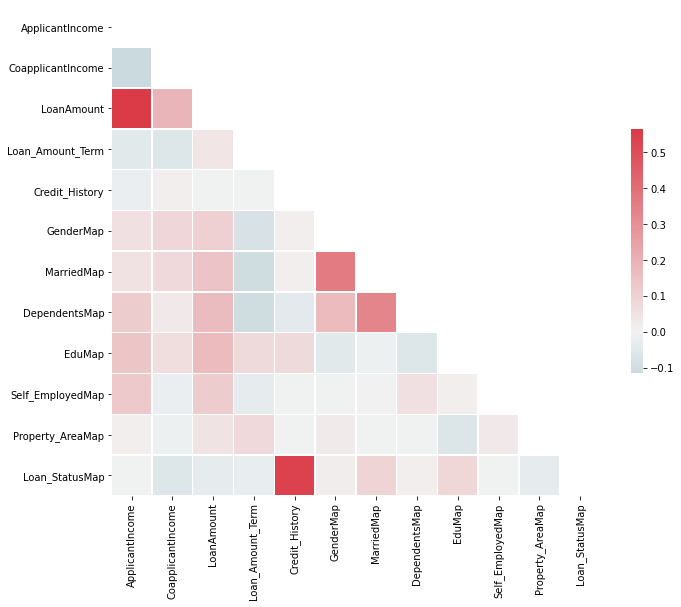

In [26]:
# Compute the correlation matrix
corr = ld.corr()

# Generate a mask for the upper triangle 
mask= np.triu(np.ones_like(corr,dtype=np.bool))

# Set up the matplotlib figure
f, ax= plt.subplots(figsize=(11,9))

# Generate custom diverging colormap
cmap = sns.diverging_palette(220,10,as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink":.5})

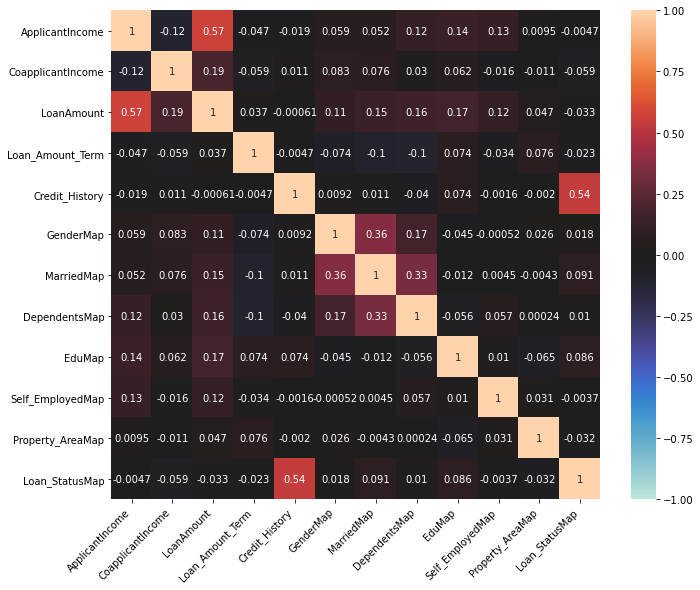

In [27]:
corr = ld.corr()
f, ax= plt.subplots(figsize=(11,9))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1 ,center=0, square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');

* Credit History has high correlation with Loan Status. This is therefore one of the most important features.
* ApplicantIncome has high correlation with LoannAmount.
* Rest of the pair-wise correlations are comparatively small.

## Preparing Train/Test Dataset:

In [28]:
from sklearn.model_selection import train_test_split

Feature_Names=["Credit_History","LoanAmount","ApplicantIncome","CoapplicantIncome","DependentsMap","Loan_Amount_Term","Property_AreaMap"]
X= ld[Feature_Names].values
y=ld["Loan_StatusMap"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Model 1:- Logistic Regression

In [29]:
# Logistic Regression
final_model= []
final_accuracy = []
final_recall0= []
final_recall1 = []
final_precision0= []
final_precision1= []

from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
# Training the model
model.fit(X_train, y_train)
y_pred= model.predict(X_test)

print("Accuracy: %.3f%%" % (model.score(X_test,y_test)*100.0))
#Confusion Matrics
from sklearn.metrics import confusion_matrix
confusion_matrix  =  confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:')
print(confusion_matrix)

#Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print('\nClassification Report')
print(classification_report(y_test, y_pred))

final_model.append("Logistic Regression")
final_accuracy.append( round(model.score(X_test, y_test)*100.0,2))
final_recall0.append( round(confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[0][1]),2))
final_recall1.append( round(confusion_matrix[1][1] / (confusion_matrix[1][1] + confusion_matrix[1][0]),2))
final_precision0.append( round(confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[1][0]),2))
final_precision1.append( round(confusion_matrix[1][1] / (confusion_matrix[1][1] + confusion_matrix[0][1]),2))


Accuracy: 78.378%

Confusion Matrix:
[[ 27  38]
 [  2 118]]

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Model 2:- Decision Tree

Text(0, 0.5, 'FP_Error')

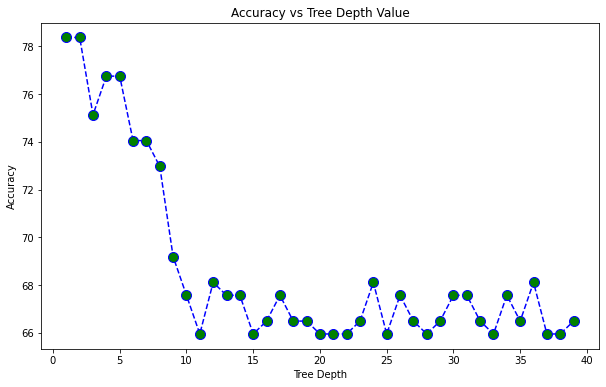

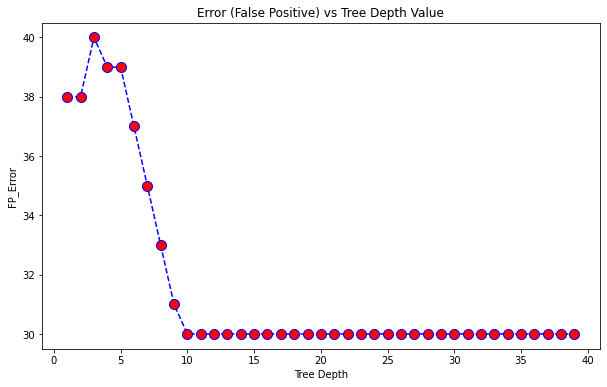

In [30]:
from sklearn.tree import DecisionTreeClassifier
accuracy_rate=[]
fp_error_rate=[]
for i in range(1,40):
    model = DecisionTreeClassifier(max_depth=i,min_samples_leaf=5)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    from sklearn.metrics import confusion_matrix
    confusion_matrix = confusion_matrix(y_test,y_pred)
    fp_error_rate.append( confusion_matrix[0][1])
    accuracy_rate.append(model.score(X_test,y_test)*100.0)
    
plt.figure( figsize=(10,6) )
plt.plot(range(1,40),accuracy_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='green',markersize=10)
plt.title('Accuracy vs Tree Depth Value')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')

plt.figure(figsize=(10,6))
plt.plot(range(1,40),fp_error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error (False Positive) vs Tree Depth Value')
plt.xlabel('Tree Depth')
plt.ylabel('FP_Error')

Based on the plots above, it can be seen that the optimal value of tree depth corresponding to high accuracy/low error comes out to be 4.

In [31]:
#Decision Tree with optimum depth=4
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4,min_samples_leaf=5)
#Training the model
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

print("Accuracy: %.3f%%" % (model.score(X_test, y_test)*100.0))
#Confusion Metrics
from sklearn.metrics import confusion_matrix
confusion_matrix= confusion_matrix(y_test,y_pred)
print('\nConfusion Matrix')
print(confusion_matrix)

#Compute precision,recall, F-measure and support
from sklearn.metrics import classification_report
print('\nClassification Report:')
print(classification_report(y_test,y_pred))

from sklearn import tree

fig,axes= plt.subplots(nrows=1,ncols=1,figsize=(80,80),dpi=200)
tree.plot_tree(model, feature_names= Feature_Names ,class_names=['Rejected','Approved'])

final_model.append("Decision Tree")
final_accuracy.append(round(model.score(X_test,y_test)*100.0,2))
final_recall0.append( round(confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[0][1]),2))
final_recall1.append( round(confusion_matrix[1][1] / (confusion_matrix[1][1] + confusion_matrix[1][0]),2))
final_precision0.append( round(confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[1][0]),2))
final_precision1.append( round(confusion_matrix[1][1] / (confusion_matrix[1][1] + confusion_matrix[0][1]),2))


Accuracy: 76.757%

Confusion Matrix
[[ 26  39]
 [  4 116]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.40      0.55        65
           1       0.75      0.97      0.84       120

    accuracy                           0.77       185
   macro avg       0.81      0.68      0.70       185
weighted avg       0.79      0.77      0.74       185



## Model 3:-K Nearest Neighbor

Text(0, 0.5, 'FP_Error')

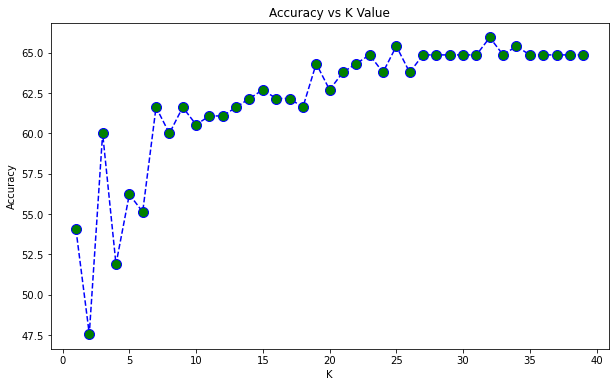

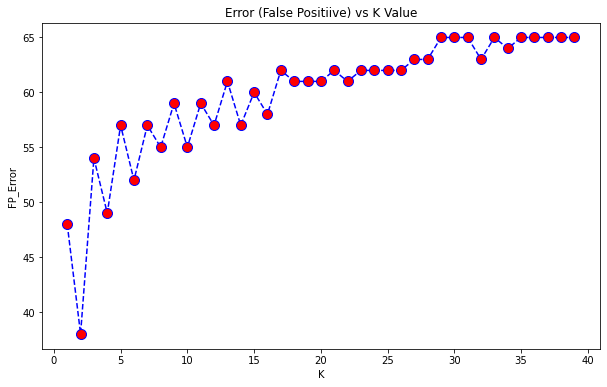

In [32]:
from sklearn.neighbors import KNeighborsClassifier

accuracy_rate = []
fp_error_rate = []
for i in range(1,40):
    model= KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    from sklearn.metrics import confusion_matrix
    confusion_matrix =  confusion_matrix(y_test, y_pred)
    fp_error_rate.append(confusion_matrix[0][1])
    accuracy_rate.append(model.score(X_test, y_test)*100.0)
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='green',markersize=10)
plt.title('Accuracy vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

plt.figure(figsize=(10,6))
plt.plot( range(1,40),fp_error_rate, color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error (False Positiive) vs K Value')
plt.xlabel('K')
plt.ylabel('FP_Error')

      
    

We select an optimum value of K=10,based on the above plots.

In [33]:
#KNN  with optimum K=10
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier(n_neighbors=10)
#Training the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy: %.3f%%"% (model.score(X_test, y_test)*100.0))
#Confusion Metrics
from sklearn.metrics import confusion_matrix
confusion_matrix= confusion_matrix(y_test,y_pred)
print('\nConfusion Matrix')
print(confusion_matrix)

#Compute precision,recall, F-measure and support
from sklearn.metrics import classification_report
print('\nClassification Report:')
print(classification_report(y_test,y_pred))
final_model.append("K Nearest Neighbour")
final_accuracy.append(round(model.score(X_test,y_test)*100.0,2))
final_recall0.append( round(confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[0][1]),2))
final_recall1.append( round(confusion_matrix[1][1] / (confusion_matrix[1][1] + confusion_matrix[1][0]),2))
final_precision0.append( round(confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[1][0]),2))
final_precision1.append( round(confusion_matrix[1][1] / (confusion_matrix[1][1] + confusion_matrix[0][1]),2))


Accuracy: 60.541%

Confusion Matrix
[[ 10  55]
 [ 18 102]]

Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.15      0.22        65
           1       0.65      0.85      0.74       120

    accuracy                           0.61       185
   macro avg       0.50      0.50      0.48       185
weighted avg       0.55      0.61      0.55       185



## Model 4:-Random Forest Classifier


We try to optimize the min_samples_leaf parameter in the classifier.

Text(0, 0.5, 'FP_Error')

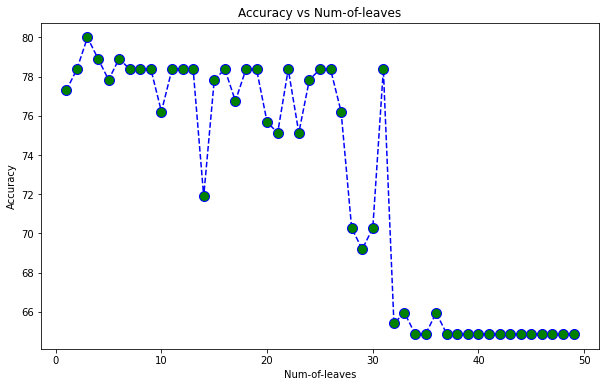

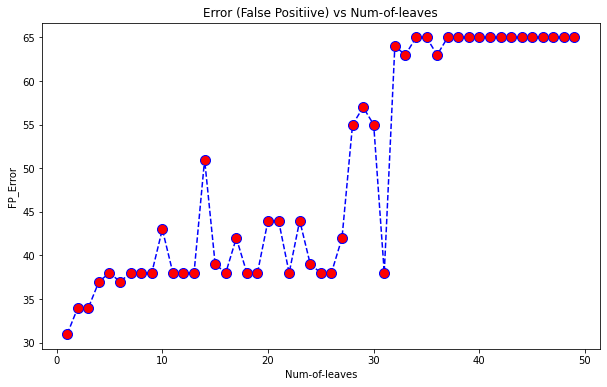

In [34]:
from sklearn.ensemble import RandomForestClassifier

accuracy_rate = []
fp_error_rate = []
for n_leaf in range(1,50):
    model= RandomForestClassifier(n_estimators=20, min_samples_leaf=n_leaf)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    from sklearn.metrics import confusion_matrix
    confusion_matrix =  confusion_matrix(y_test, y_pred)
    fp_error_rate.append(confusion_matrix[0][1])
    accuracy_rate.append(model.score(X_test, y_test)*100.0)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,50),accuracy_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='green',markersize=10)
plt.title('Accuracy vs Num-of-leaves')
plt.xlabel('Num-of-leaves')
plt.ylabel('Accuracy')

plt.figure(figsize=(10,6))
plt.plot( range(1,50),fp_error_rate, color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error (False Positiive) vs Num-of-leaves')
plt.xlabel('Num-of-leaves')
plt.ylabel('FP_Error')

We select min_samples_leaf parameter as 10 based on the above plots.Now we try to optimize the number of trees and depth of each tree in the forest.

In [35]:
from sklearn.ensemble import RandomForestClassifier
accuracy_rate = []
fp_error_rate = []
heatmap_accuracy = []
heatmap_error = []
for n_tree in range(1,20):
    accuracy_rate = []
    fp_error_rate = []
    for n_depth in range(1,10):
        model= RandomForestClassifier(n_estimators=n_tree ,max_depth=n_depth,min_samples_leaf=10,max_features=3)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        from sklearn.metrics import confusion_matrix
        confusion_matrix =  confusion_matrix(y_test, y_pred)
        fp_error_rate.append(confusion_matrix[0][1])
        accuracy_rate.append(model.score(X_test, y_test)*100.0)
    heatmap_accuracy.append(accuracy_rate)
    heatmap_error.append(fp_error_rate)
    

<AxesSubplot:>

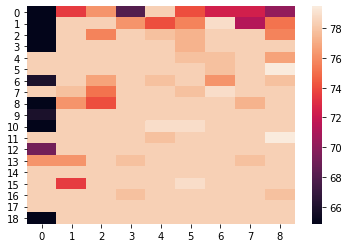

In [36]:
sns.heatmap(heatmap_accuracy)

<AxesSubplot:>

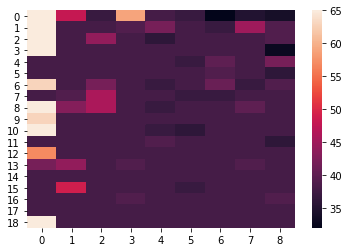

In [37]:
sns.heatmap(heatmap_error)

We select n_estimators=6 and max_depth=5 as optimal parameters based on the above heatmap.

Running the classifier again with all the optimized parameters.

In [38]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=n_tree ,max_depth=n_depth,min_samples_leaf=10,max_features=3)
#Training the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy: %.3f%%"% (model.score(X_test, y_test)*100.0))
#Confusion Metrics
from sklearn.metrics import confusion_matrix
confusion_matrix= confusion_matrix(y_test,y_pred)
print('\nConfusion Matrix')
print(confusion_matrix)

#Compute precision,recall, F-measure and support
from sklearn.metrics import classification_report
print('\nClassification Report:')
print(classification_report(y_test,y_pred))


Accuracy: 78.378%

Confusion Matrix
[[ 27  38]
 [  2 118]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185



We will also explore GridSearchCV as an option to determine the optimized parameters.

In [39]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid={
    'n_estimators':np.arange(1,20,2),
    'max_depth':np.arange(1,4),
    'min_samples_leaf':np.arange(1,40,10),
    'max_features':[2,3,4]
}
CV_model = GridSearchCV(estimator=model, param_grid=param_grid,cv=5)
CV_model.fit(X_train, y_train)
best_params= CV_model.best_params_

print('\n',best_params)


 {'max_depth': 2, 'max_features': 3, 'min_samples_leaf': 21, 'n_estimators': 15}


Running the classifier with the optimized parameters determined from GridSearchCV.

In [40]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=15 ,max_depth=2,min_samples_leaf=21,max_features=3)
#Training the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy: %.3f%%"% (model.score(X_test, y_test)*100.0))
#Confusion Metrics
from sklearn.metrics import confusion_matrix
confusion_matrix= confusion_matrix(y_test,y_pred)
print('\nConfusion Matrix')
print(confusion_matrix)
#Compute precision,recall, F-measure and support
from sklearn.metrics import classification_report
print('\nClassification Report:')
print(classification_report(y_test,y_pred))

final_model.append("Random Forest")
final_accuracy.append(round(model.score(X_test,y_test)*100.0,2))
final_recall0.append( round(confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[0][1]),2))
final_recall1.append( round(confusion_matrix[1][1] / (confusion_matrix[1][1] + confusion_matrix[1][0]),2))
final_precision0.append( round(confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[1][0]),2))
final_precision1.append( round(confusion_matrix[1][1] / (confusion_matrix[1][1] + confusion_matrix[0][1]),2))

  

Accuracy: 78.378%

Confusion Matrix
[[ 27  38]
 [  2 118]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185



We will now try to optimize the Decision Threshold and analyse the accuracy of the classifier for different values.

Text(0, 0.5, 'Accuracy (%)')

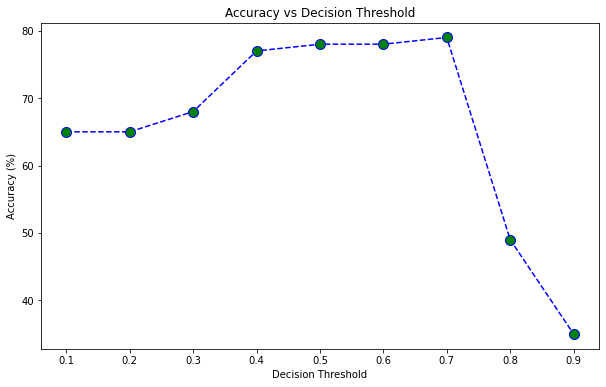

In [41]:
#Updating Decision Threshold
from sklearn.metrics import accuracy_score
accuracy_rate = []
for threshold in np.arange(0.1 ,1 ,0.1):
    predicted_proba = model.predict_proba(X_test)
    predicted = (predicted_proba [:,1] >= threshold).astype('int')
    accuracy_rate.append( round(accuracy_score(y_test,predicted)*100))

plt.figure(figsize=(10,6))
plt.plot(np.arange(0.1,1,0.1),accuracy_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='green',markersize=10)
plt.title('Accuracy vs Decision Threshold')
plt.xlabel('Decision Threshold')
plt.ylabel('Accuracy (%)')

It can be seen from the above plot that the accuracy doesnt improve much by changing the threshold from its default value of 0.5

# Conclusion

In [42]:
#summary of all models
final_model.append("Metric")
final_accuracy.append("Accuracy (%)")
final_recall0.append("Recall (No) ")
final_recall1.append("Recall (Yes)")
final_precision0.append("Precision (No)")
final_precision1.append("Precision (Yes)")
data=array([final_model, final_accuracy, final_recall0, final_precision0, final_recall1, final_precision1])
pd=pd.DataFrame(data=data[1:,:-1],columns=data[0,:-1],index=data[1:,-1])
display(pd)

,Logistic Regression,Decision Tree,K Nearest Neighbour,Random Forest
Accuracy (%),78.38,76.76,60.54,78.38
Recall (No),0.42,0.4,0.15,0.42
Precision (No),0.93,0.87,0.36,0.93
Recall (Yes),0.98,0.97,0.85,0.98
Precision (Yes),0.76,0.75,0.65,0.76


Text(0, 0.5, 'Accuracy (%)')

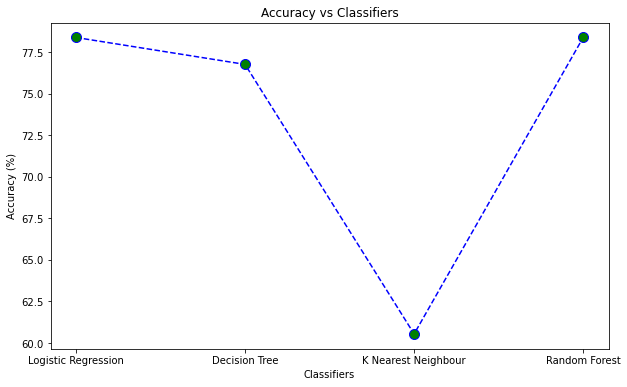

In [43]:
plt.figure(figsize=(10,6))
plt.plot(final_model[0:-1],final_accuracy[0:-1],color='blue',linestyle='dashed',marker='o',markerfacecolor='green',markersize=10)
plt.title('Accuracy vs Classifiers')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy (%)')

We can now conclude that Logistic Regression and Random Forest classifiers have similar accuracy in predicting loan status.We did extensive analysis of the input data and were able to acheive test accuracy of nearly 79%.